## Ejercicio 3
Cree una función que dada una pareja ordenada $(x,y)\in \mathbb{R}^2$ determine si esa pareja está dentro del círculo centrado en $(0,0)$ de radio $1$. Es decir, su función debe retornar la proposición $x^2+y^2<1^2=1$. <br>
Genere $N=100$ parejas ordenadas aleatorias dentro del cuadrado de centro $(0,0)$ con lados de tamaño $2$. Compute la fracción # de parejas que caen dentro del círculo / N y note que cuando $N$ crece, esa fracción se acerca a $\pi /4 $.
<br><br><br>
Una buena idea para convencer personas, ajenas a la analítica de datos, de los resultados obtenidos en un ejercicio es visualizar la información de forma intuitiva. Una de las librerías que usaremos para visualizar datos será matplotlib. El siguiente código muestra exactamente los puntos aleatorios que generamos que caen dentro del círculo. Para graficar los puntos usamos la función "scatter" que está en la librería matplitlib.pyplot.

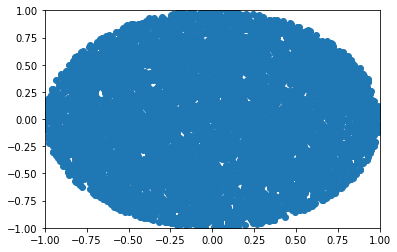

3.1492
Wall time: 0 ns


In [10]:
import matplotlib.pyplot as pl #Importando matplotlib
#scatter--> coger una lista de puntos y graficarlos como puntos aislados
#plot--> coger una lista de puntos pero los grafica interpolados
def estaCirculo(x,y):
    return x**2+y**2<1
from random import uniform # uniform(a,b)--> devuelve un número entre a y b inclusive
N = 10000
num = 0
xLista = []
yLista = []
for i in range(N):
    x = uniform(-1,1)
    y = uniform(-1,1)
    if estaCirculo(x,y): #aca entro si y solo si (x,y) esta dentro del ciruclo
        num = num+1
        xLista.append(x) #concatenando a derecha el valor x en la lista xLista.
        yLista.append(y)
#print(xLista)
#print(yLista)
pl.scatter(xLista,yLista)
pl.xlim(-1,1)
pl.ylim(-1,1)
pl.show()
print(num/N*4)
%time


### Listas por comprensión

En python, las listas pueden definirse usando una regla que contenga a todos sus elementos, por ejemplo, si quiero todos los números de la forma $x^2$ en el rango $-100\leq x<100$, entonces uno puede usar la iteración for para generar todos los elementos. A continuación se ve cómo generar esa lista y cómo graficar(con interpolación) en pyplot.

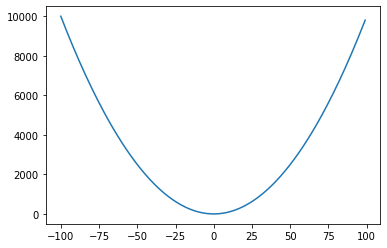

In [17]:
cuad = [x**2 for x in range(-100,100)]
#print(cuad)
pl.plot([x for x in range(-100,100)],cuad)
pl.show()

### De cadenas a arreglos y viceversa.

A veces uno lee sus datos en forma de una cadena(sucesión de carácteres) y necesita manipularla de alguna forma. Si esos datos tienen un "token" asociado, es decir, un delimitador de dónde empieza cada dato y dónde termina, entonces a uno le interesa usar la función split de cadenas. La función split sobre una cadena $x$ necesita otra cadena $y$ que sea el token. Se ejecuta de la forma: x.split(y) y genera una lista cuyos elementos son precisamente las cadenas conteniendo los datos ya sin el delimitador.<br><br>

Qué pasa si uno quiere devolverse? Pues si uno tiene una lista (llamémosla A) con los datos todos de tipo str, uno puede devolverse a la cadena usando la función join. Si el token está en la variable $y$, entonces y.join(A) será una cadena donde estén los elementos de A separados por el token $y$.




In [24]:
a = "h;la"*10
print(";" in a)
print(a.index("o"))
b = a.split(";")
aa = ";".join(b)
print(a)
print(b)
print(aa)

True


ValueError: substring not found

## Las listas son dinámicas

Las listas en python funcionan como sucesiones, es decir, uno puede acceder a varios objetos usándolas. Algo importante acerca de estas listas es que podemos "concatenarles" más elementos al final. O sea, si empiezo con la lista [1,3,5] y me gustaría añadir $2$ a la lista, puedo hacerlo al final de la lista, o sea, puedo generar la lista [1,3,5,2]. Esto se hace usando la función append. A continuación un ejemplo.


In [5]:
A = [1,3,5]
print(A)
A.append(2)
print(A)

[1, 3, 5]
[1, 3, 5, 2]


### Ejercicio 1
   Haga una funcion, que al pasarle como parámetro una cadena que represente una fila en la tabla del ejercicio que hicimos el Martes (i.e., "Diego|3.0|1.2|0.0|5.0"), me retorne una fila (como cadena) donde a cada nota le suba una unidad.

## Map

En los ejercicios que hemos hecho, si queremos ejecutar algunas operaciones o una función sobre todos los datos de un arreglo, tenemos que iterar el arreglo usando la estructura de control for. Map es una función de python que permite ahorrarnos ese for y funciona de la siguiente manera. Si tenemos una funcion "func" y un arreglo A, entonces list(map(func,A)) general la lista de todos los resultados de ejecutar la función func en el arreglo A. A continuación usamos la función map para elevar al cuadrado todos los elementos de un arreglo A.

In [1]:
def cuad(x):
    return x**2
A = [i for i in range(11)]
B = list(map(cuad,A))
print(A)
print(B)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


El siguiente código es la solución al ejercicio 1 usando la función map.

In [32]:
def subirNota(notaS):
    notai = float(notaS)+1 # ya subí la nota una unidad.
    if notai>5.0:
        notai = 5.0
    return str(notai)
def subirUnidad(filaS):
    fila = filaS.split("|")
    filaN = [fila[0]] # mi arreglo se compone solamente de el nombre
    filaN = filaN+list(map(subirNota,fila[1:len(fila)]))
    return "|".join(filaN)
print(subirUnidad("Diego|3.0|1.2|0.0|5.0"))

Diego|4.0|2.2|1.0|5.0


## Filter

Filter es una función que se parece a map, en el sentido que también itera el arreglo A y evalúa una función func, pero tiene como restricción que la función func **tiene que devolver un valor Booleano**. Lo que hace la función filter es quitar del arreglo todos los elementos $x$ del mismo tales que func(x) sea False. A continuación, usamos la función filter para filtrar los números pares del arreglo A en el arreglo B.

In [36]:
def esPar(x):
    return x%2==0
A = [i for i in range(20)]
B = list(filter(esPar,A))
print(A)
print(B)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## Ejercicio

Haga una funcion, que al pasarle como parámetro una cadena que represente una fila en la tabla del ejercicio que hicimos el Martes (i.e., "Diego|3.0|1.2|0.0|5.0"), me retorne una fila (como cadena) donde solamente queden las notas mayores a 2.9.

In [4]:
def esMayor(notaS):
    return float(notaS)>2.9
def subirUnidad(filaS):
    fila = filaS.split("|")
    filaN = [fila[0]] # mi arreglo se compone solamente de el nombre
    filaN = filaN+list(filter(esMayor,fila[1:len(fila)]))
    return "|".join(filaN)
print(subirUnidad("Diego|3.0|1.2|0.0|5.0"))

Diego|3.0|5.0
